## Overview

This notebook entails code for developing an object detection algorithm to detect plant diseases. The YOLOV5 algorithm will be utilized for this project.

The data utilized to train the model is the [Plant Doc datset](https://public.roboflow.com/object-detection/plantdoc) from India.

The script entails:

- Importing dependencies
- Downloading YOLOV5 repo from ultralytics
- Training the YOLOV5 algorithm on custonm data from Plant Doc
- Running inference on the model
- Exporting the model (to be utilized in disease detection web application)

## 1. Import Dependencies

In [1]:
## Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Set working directory
import os
os.chdir('/content/drive/MyDrive/Capstone-Project/Object-Detection')

In [3]:
#clone YOLOv5 repo from ultralytics and import
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Capstone-Project/Object-Detection/yolov5
     |████████████████████████████████| 596 kB 28.1 MB/s 
     |████████████████████████████████| 145 kB 39.7 MB/s 
     |████████████████████████████████| 178 kB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 37.8 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 138 kB 46.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires img

## 2. Train Model

After cloning the YOLOV5 repo from ultralytics, we add a custom yaml file pointing to our custom data and labels.

In [4]:
## Set working directory
os.chdir('/content/drive/MyDrive/Capstone-Project/Object-Detection/yolov5')

In [7]:
## Run train script with custom yaml file and data
!python train.py --img 416 --batch 16 --epochs 100 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-161-ge54e758 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

Training the model for 100 epochs achieved a mAP score of 0.625

## 3. Model Inferencing

We will use the detect.py file in the cloned YOLOV5 repo to test our algorithm on a custom video with diseased tomato plants. The video is a clip from my farm in Machakos, Kenya

In [7]:
!python detect.py --weights runs/train/exp12/weights/best.pt --img 256 --conf 0.1 --source /content/drive/MyDrive/Capstone-Project/Object-Detection/Tomato_Videos/20220426_131803.mp4

detect: weights=['runs/train/exp12/weights/best.pt'], source=/content/drive/MyDrive/Capstone-Project/Object-Detection/Tomato_Videos/20220426_131803.mp4, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-161-ge54e758 torch 1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7091035 parameters, 0 gradients, 16.1 GFLOPs
video 1/1 (1/390) /content/drive/MyDrive/Capstone-Project/Object-Detection/Tomato_Videos/20220426_131803.mp4: 160x256 1 Bell_pepper leaf spot, 7 Tomato leaf bacterial spots, 1 Tomato leaf late blight, Done. (0.054s)
video 1/1 (2/390) /content/drive/MyDrive/Capstone-Project/Object-Detection/Tomato_Videos/20220426_131803.mp4: 

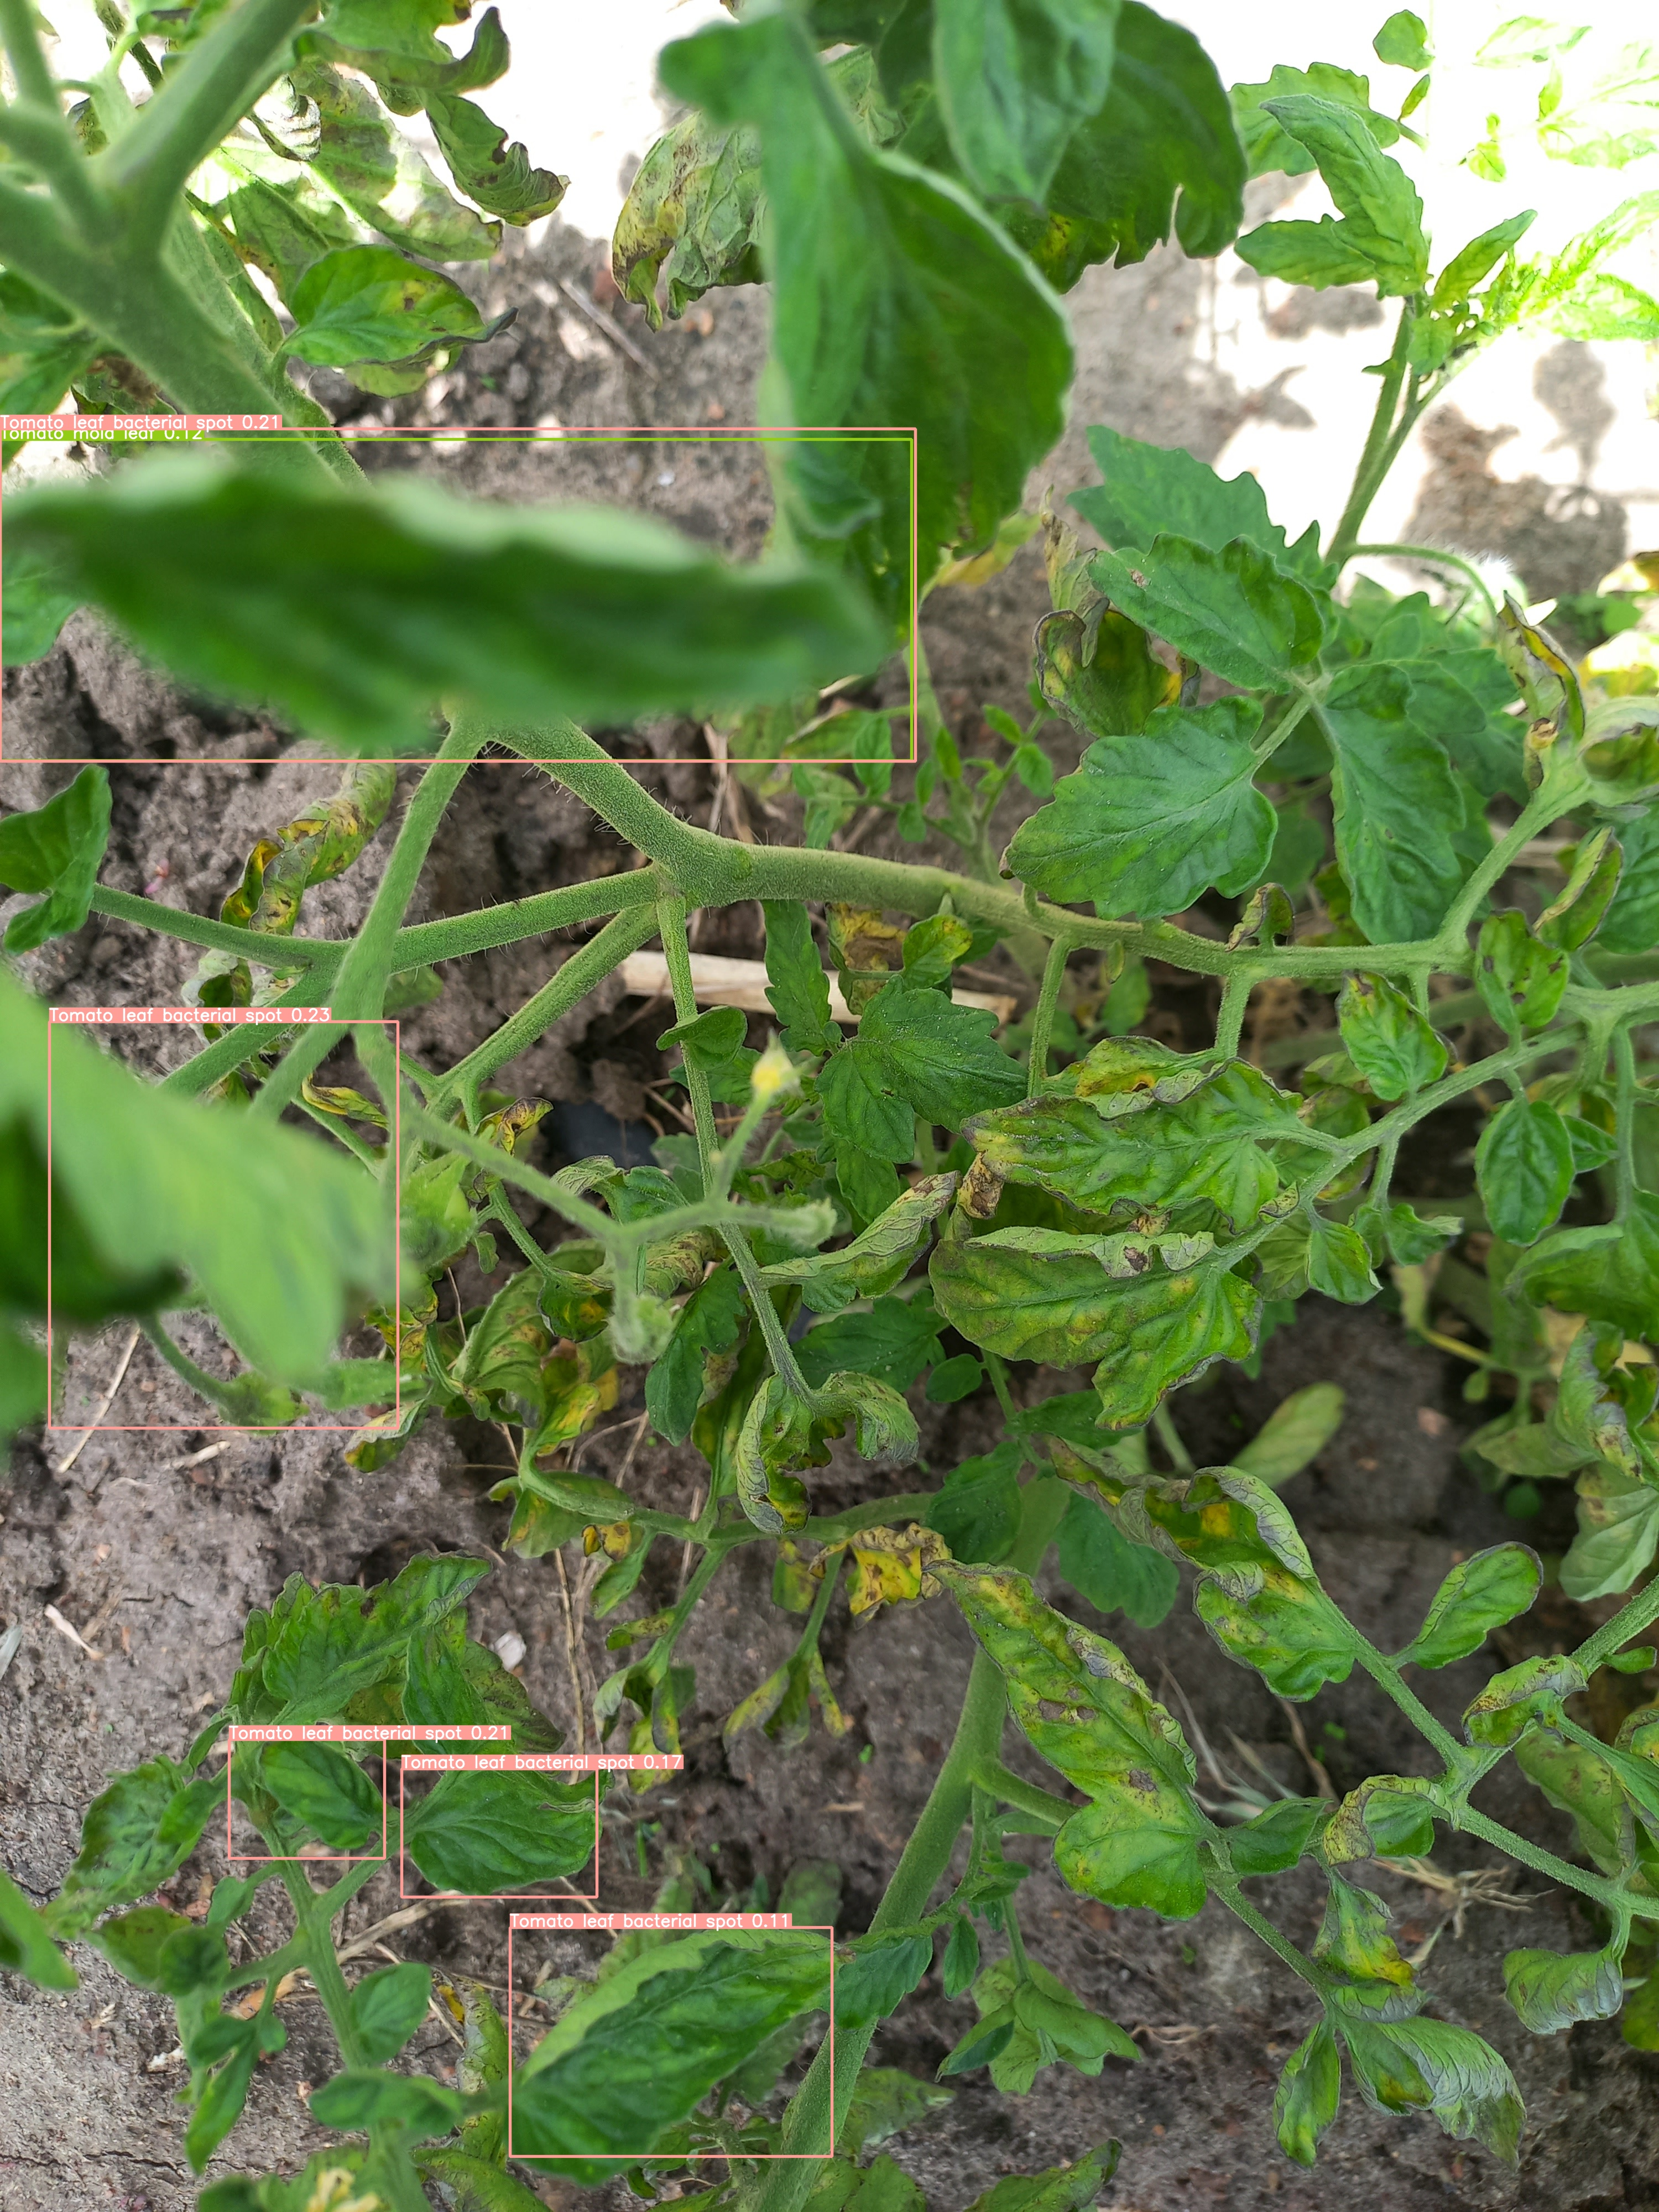

In [8]:
Image(filename='/content/drive/MyDrive/Capstone-Project/Object-Detection/yolov5/runs/detect/exp8/20220426_131757.jpg',width=1000)

## 4. Export Model

The model is exported to be utilized in the disease detection web application.

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>